In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skfuzzy as fuzz

In [205]:
df1=pd.read_excel('SAT_GPA.xls')

In [206]:
df1=df1[['univ_GPA','SAT']]

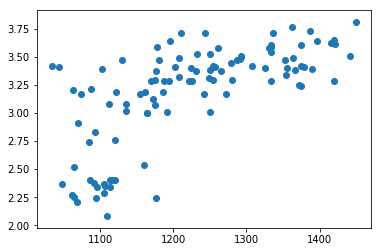

In [207]:
plt.scatter(df1['SAT'],df1['univ_GPA'])

In [208]:
df1

,univ_GPA,SAT
0,3.52,1232
1,2.91,1070
2,2.40,1086
3,3.47,1287
4,3.47,1130
5,2.37,1048
6,2.40,1121
7,2.24,1095
8,3.02,1135
9,3.32,1208


In [209]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300, tol=0.0001).fit(df1)
classier=kmeans.labels_
classier

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int32)

In [210]:
kmeans.cluster_centers_

array([[   3.45978261, 1329.93478261],
       [   2.94915254, 1137.27118644]])

Text(0, 0.5, 'University GPA')

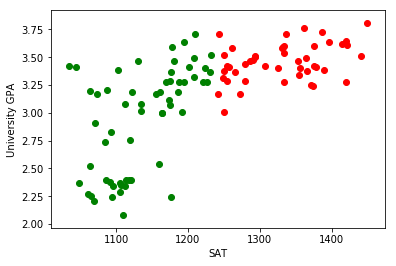

In [211]:
red=[]
green=[]
redy=[]
greeny=[]
redcount=0
greencount=0
for i in range(len(df1)):
    if classier[i]==0:
        plt.scatter(df1['SAT'][i],df1['univ_GPA'][i],color='red')
        red.append(df1['SAT'][i])
        redy.append(df1['univ_GPA'][i])
        redcount+=1
    else:
        plt.scatter(df1['SAT'][i],df1['univ_GPA'][i],color='green') 
        green.append(df1['SAT'][i])
        greeny.append(df1['univ_GPA'][i])
        greencount+=1
plt.xlabel('SAT')
plt.ylabel('University GPA')

In [212]:
sat1=np.arange(1034,1137.3,0.02)
sat2=np.arange(1089.95,1232,0.02)
sat3=np.arange(1242,1373.85,0.02)
sat4=np.arange(1329.9,1450,0.02)
gpa=np.arange(2,4,0.01)

In [213]:
#generate membership functions
sat1_lo=fuzz.trimf(sat1,[1034,1034,1090])
sat1_md=fuzz.trimf(sat1,[1034,1090,1137.3])
sat1_hi=fuzz.trimf(sat1,[1090,1137.3,1137.3])

sat2_lo=fuzz.trimf(sat2,[1089.95,1089.95,1137.30])
sat2_md=fuzz.trimf(sat2,[1089.95,1137.30,1232.00])
sat2_hi=fuzz.trimf(sat2,[1137.30,1232.00,1232.00])

sat3_lo=fuzz.trimf(sat3,[1242,1242,1329.9])
sat3_md=fuzz.trimf(sat3,[1242,1329.9,1373.85])
sat3_hi=fuzz.trimf(sat3,[1090,1137.3,1137.3])

sat4_lo=fuzz.trimf(sat4,[0,0,1329.9])
sat4_md=fuzz.trimf(sat4,[1329.9,1340.6,1450])
sat4_hi=fuzz.trimf(sat4,[1340.6,1450,1450])

gpa1_lo=fuzz.trimf(gpa,[2.08,2.08,2.74])
gpa1_md=fuzz.trimf(gpa,[2.08,2.74,2.95])
gpa1_hi=fuzz.trimf(gpa,[2.74,2.95,2.95])

gpa2_lo=fuzz.trimf(gpa,[2.57,2.57,2.95])
gpa2_md=fuzz.trimf(gpa,[2.57,2.95,3.71])
gpa2_hi=fuzz.trimf(gpa,[2.95,3.71,3.71])

gpa3_lo=fuzz.trimf(gpa,[3.01,3.01,3.35])
gpa3_md=fuzz.trimf(gpa,[3.01,3.35,3.46])
gpa3_hi=fuzz.trimf(gpa,[3.35,3.46,3.46])

gpa4_lo=fuzz.trimf(gpa,[3.285,3.285,3.46])
gpa4_md=fuzz.trimf(gpa,[3.285,3.46,3.81])
gpa4_hi=fuzz.trimf(gpa,[3.46,3.81,3.81])

In [214]:
# SAT1=np.concatenate((sat1,sat2))
# SAT1_lo=np.concatenate((sat1_lo,sat2_lo))
# SAT1_md=np.concatenate((sat1_md,sat2_md))
# SAT1_hi=np.concatenate((sat1_hi,sat2_hi))

In [215]:
# SAT2=np.concatenate((sat3,sat4))
# SAT2_lo=np.concatenate((sat3_lo,sat4_lo))
# SAT2_md=np.concatenate((sat3_md,sat4_md))
# SAT2_hi=np.concatenate((sat3_hi,sat4_hi))

In [216]:
#Rule application
sa1_lo=fuzz.interp_membership(sat1,sat1_lo,1231.9)
sa1_md=fuzz.interp_membership(sat1,sat1_md,1231.9)
sa1_hi=fuzz.interp_membership(sat1,sat1_hi,1231.9)

sa2_lo=fuzz.interp_membership(sat2,sat2_lo,1231.9)
sa2_md=fuzz.interp_membership(sat2,sat2_md,1231.9)
sa2_hi=fuzz.interp_membership(sat2,sat2_hi,1231.9)

In [217]:
rule1_lo=np.fmin(np.fmax(sa1_lo,sa2_lo),np.fmax(gpa1_lo,gpa2_lo))
rule1_md=np.fmin(np.fmax(sa1_md,sa2_md),np.fmax(gpa1_md,gpa2_md))
rule1_hi=np.fmin(np.fmax(sa1_hi,sa2_hi),np.fmax(gpa1_hi,gpa2_hi))

In [218]:
aggregated=np.fmax(rule1_lo,np.fmax(rule1_md,rule1_hi))

In [219]:
gp=fuzz.defuzz(gpa,aggregated,'centroid')
gpa=fuzz.interp_membership(gpa,aggregated,gp)

In [220]:
gp

3.3305628046853526